# WARAS APP - BANGKIT ACADEMY 2022

## Machine Learning Model - Deep Neural Network

### Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

Make NumPy printouts easier to read

In [2]:
np.set_printoptions(precision = 3, suppress = True)

### Import dataset

In [3]:
dataset = pd.read_csv ('Data Clean.csv')
dataset

,Umur,Gender,Tanggal_konfirmasi,Tanggal_sembuh,Demam,Batuk,Kelelahan,Sakit_tenggorokan,Pilek,Sesak_napas,Muntah,Lama_hari_sembuh
0,44,0,2020-01-21,2020-01-29,1,0,1,0,0,0,0,8
1,39,0,2020-01-24,2020-02-03,1,0,1,0,1,0,0,10
2,30,1,2020-01-15,2020-01-15,1,1,0,1,0,0,0,0
3,66,1,2020-01-23,2020-02-19,1,1,0,0,0,0,0,27
4,40,1,2020-01-25,2020-02-08,1,1,0,0,0,0,0,14
5,33,1,2020-01-27,2020-01-27,1,0,1,1,0,0,0,0
6,1,0,2020-02-08,2020-02-17,0,0,0,0,0,0,0,9
7,30,0,2020-01-24,2020-02-12,1,1,1,0,0,0,0,19
8,31,1,2020-01-24,2020-02-12,1,1,0,0,0,0,0,19
9,29,1,2020-01-24,2020-01-28,0,0,0,0,0,0,0,4


Delete 'Tanggal_konfirmasi' and 'Tanggal_sembuh' columns

In [4]:
dataset.drop(['Tanggal_konfirmasi', 'Tanggal_sembuh'], axis = 1, inplace = True) 

Change some contents in dataset

In [5]:
dataset.drop([45, 48], axis=0, inplace=True)

In [6]:
dataset = dataset.append({'Umur': 55, 'Gender': 1, 'Demam': 1, 'Batuk': 0, 'Kelelahan': 0, 'Sakit_tenggorokan': 0, 'Pilek': 0, 'Sesak_napas': 0, 'Muntah': 1, 'Lama_hari_sembuh': 12}, ignore_index=True)
dataset = dataset.append({'Umur': 32, 'Gender': 1, 'Demam': 1, 'Batuk': 1, 'Kelelahan': 0, 'Sakit_tenggorokan': 0, 'Pilek': 0, 'Sesak_napas': 1, 'Muntah': 1, 'Lama_hari_sembuh': 7}, ignore_index=True)

In [8]:
dataset.drop([6, 18, 22, 46], axis=0, inplace=True)

In [29]:
dataset.reset_index(drop=True, inplace=True)

Check dataset

In [30]:
dataset

,Umur,Gender,Demam,Batuk,Kelelahan,Sakit_tenggorokan,Pilek,Sesak_napas,Muntah,Lama_hari_sembuh
0,44,0,1,0,1,0,0,0,0,8
1,39,0,1,0,1,0,1,0,0,10
2,30,1,1,1,0,1,0,0,0,0
3,66,1,1,1,0,0,0,0,0,27
4,40,1,1,1,0,0,0,0,0,14
5,33,1,1,0,1,1,0,0,0,0
6,30,0,1,1,1,0,0,0,0,19
7,31,1,1,1,0,0,0,0,0,19
8,29,1,0,0,0,0,0,0,0,4
9,55,1,1,0,0,0,0,0,0,12


Save dataset to .csv

In [31]:
#dataset.to_csv("Data_Clean_2.csv", index=False)

### Split dataset into training and testing

In [10]:
x_train = dataset.sample(frac = 0.8, random_state = 0)
x_test = dataset.drop(x_train.index)

Inspect the data

Review the joint distribution of columns from the training set.
The top row suggests that the 'Lama_hari_sembuh' is a function of all the other parameters. The other rows indicate they are functions of each other.

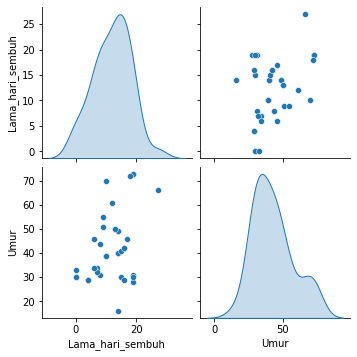

In [11]:
sns.pairplot(x_train[['Lama_hari_sembuh', 'Umur']], diag_kind = 'kde')

<AxesSubplot:xlabel='Lama_hari_sembuh', ylabel='Umur'>

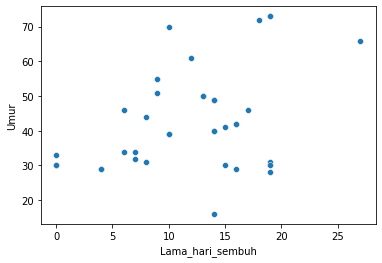

In [12]:
sns.scatterplot(x = 'Lama_hari_sembuh', y = 'Umur', data = x_train)

Check the overall statistics

In [13]:
x_train.describe()

,Umur,Gender,Demam,Batuk,Kelelahan,Sakit_tenggorokan,Pilek,Sesak_napas,Muntah,Lama_hari_sembuh
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,42.810811,0.621622,0.648649,0.486486,0.189189,0.162162,0.135135,0.027027,0.027027,11.918919
std,14.494899,0.491672,0.483978,0.506712,0.397061,0.373684,0.346583,0.164399,0.164399,6.152589
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
75%,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000


Split features from labels

In [14]:
y_train = x_train.copy()
y_test = x_test.copy()

train_labels = y_train.pop('Lama_hari_sembuh')
test_labels = y_test.pop('Lama_hari_sembuh')

### Normalization

Create the layer

In [15]:
normalizer = tf.keras.layers.Normalization(axis = -1, input_shape = [9])

Fit the state of the preprocessing layer to the data

In [16]:
normalizer.adapt(np.asarray(y_train))

Calculate the mean and variance, and store them in the layer

In [17]:
print(normalizer.mean.numpy())

[[42.811  0.622  0.649  0.486  0.189  0.162  0.135  0.027  0.027]]


When the layer is called, it returns the input data, with each feature independently normalized

In [18]:
first = np.array(y_train[:1])

with np.printoptions(precision = 2, suppress = True):
  print('First example:', first)
  print('Normalized:', normalizer(first).numpy())

First example: [[46  1  1  1  0  0  0  0  0]]
Normalized: [[ 0.22  0.78  0.74  1.03 -0.48 -0.44 -0.4  -0.17 -0.17]]


- The normalization layer (normalizer).
- Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
- A linear Dense single-output layer.

In [19]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', metrics = ['mse'],
              optimizer=tf.keras.optimizers.Adam(0.001))

### Train the model with Keras Model.fit

In [20]:
history = model.fit(
    y_train,
    train_labels,
    validation_split = 0.2,
    epochs = 100)

Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 11.2240 - mse: 163.0473 - val_loss: 14.6526 - val_mse: 238.7918
Epoch 2/100
1/1 [==============================] - 1s 622ms/step - loss: 11.1537 - mse: 161.2762 - val_loss: 14.5741 - val_mse: 236.4582
Epoch 3/100
1/1 [==============================] - 0s 385ms/step - loss: 11.0832 - mse: 159.5211 - val_loss: 14.4959 - val_mse: 234.1473
Epoch 4/100
1/1 [==============================] - 1s 535ms/step - loss: 11.0125 - mse: 157.7794 - val_loss: 14.4171 - val_mse: 231.8303
Epoch 5/100
1/1 [==============================] - 1s 736ms/step - loss: 10.9415 - mse: 156.0509 - val_loss: 14.3379 - val_mse: 229.5265
Epoch 6/100
1/1 [==============================] - 1s 716ms/step - loss: 10.8704 - mse: 154.3392 - val_loss: 14.2570 - val_mse: 227.1896
Epoch 7/100
1/1 [==============================] - 0s 378ms/step - loss: 10.7987 - mse: 152.6333 - val_loss: 14.1755 - val_mse: 224.8476
Epoch 8/100
1/1 [=========================

Review the architecture of the network

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


### Model Evaluation

Evaluating MAE from the model

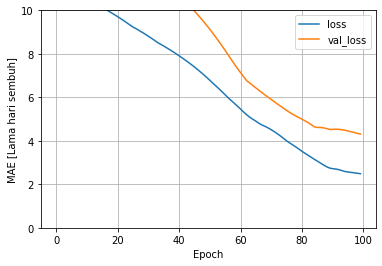

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('MAE [Lama hari sembuh]')
plt.legend()
plt.grid(True)

Evaluating MSE from the model

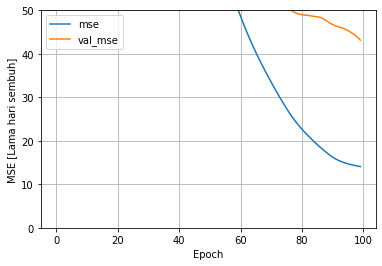

In [23]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('MSE [Lama hari sembuh]')
plt.legend()
plt.grid(True)

Model evaluation for data testing

In [24]:
model.evaluate(y_test, test_labels)

1/1 [==============================] - 0s 60ms/step - loss: 3.6188 - mse: 37.9675


[3.61879301071167, 37.96754455566406]

### Make predictions

Make predictions with the model on the test dataset using Keras Model.predict and review the loss

1/1 [==============================] - 0s 201ms/step


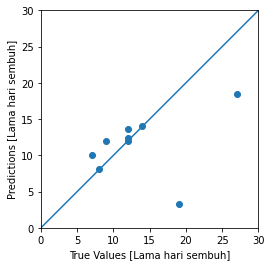

In [25]:
test_predictions = model.predict(y_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Lama hari sembuh]')
plt.ylabel('Predictions [Lama hari sembuh]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Check the error distribution

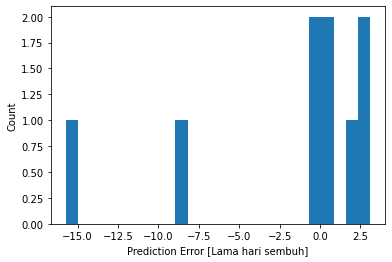

In [26]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [Lama hari sembuh]')
_ = plt.ylabel('Count')

Prediction with manual input

In [27]:
Lama_hari_sembuh = model.predict([20, 1, 0, 1, 0, 0, 0, 0, 1])
print ("Lama hari sembuh: ",Lama_hari_sembuh)
print ("Lama hari sembuh: ",np.round(Lama_hari_sembuh))
print ("Lama hari sembuh: ",int(Lama_hari_sembuh))

1/1 [==============================] - 0s 212ms/step
Lama hari sembuh:  [[9.323]]
Lama hari sembuh:  [[9.]]
Lama hari sembuh:  9


### Save the model

In [28]:
#model.save('dnn4_model')